In [ ]:
!wget https://raw.githubusercontent.com/boazbk/tcscode/master/Utilities.ipynb
# get utility code from repository

In [ ]:
!pip install schemdraw
from schemdraw.parsing import logicparse

In [ ]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [ ]:
def AND(a, b):  return a * b
def OR(a, b):   return 1 if a + b else 0
def NOT(a):     return 1 - a
def NAND(a, b): return NOT(AND(a, b))

In [ ]:
"""AON-CIRC Programs"""
def EQ(a, b):  return NOT(AND(OR(a, b), NOT(AND(a, b)))) # NOT(XOR(a, b))
def GT(a, b):  return AND(a, NOT(b))
def LT(a, b):  return AND(NOT(a), b)
def GTE(a, b): return OR(a, NOT(b))
def LTE(a, b): return OR(NOT(a), b)

In [ ]:
"""OUTPUTS"""
F = [EQ, GT, LT, GTE, LTE]
T = ["EQ", "GT", "LT", "GTE", "LTE"]
for i, (f, t) in enumerate(zip(F, T)):
  print([t + "(" + str(a) + ", " + str(b) + ") = " + str(True if f(a, b) else False) for a in [0, 1] for b in [0, 1]])


['EQ(0, 0) = True', 'EQ(0, 1) = False', 'EQ(1, 0) = False', 'EQ(1, 1) = True']
['GT(0, 0) = False', 'GT(0, 1) = False', 'GT(1, 0) = True', 'GT(1, 1) = False']
['LT(0, 0) = False', 'LT(0, 1) = True', 'LT(1, 0) = False', 'LT(1, 1) = False']
['GTE(0, 0) = True', 'GTE(0, 1) = False', 'GTE(1, 0) = True', 'GTE(1, 1) = True']
['LTE(0, 0) = True', 'LTE(0, 1) = True', 'LTE(1, 0) = False', 'LTE(1, 1) = True']


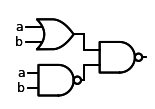

In [59]:
logicparse('not ((a or b) and not (a and b))') # EQ(a, b)

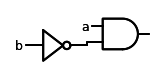

In [ ]:
logicparse('a and not b') # GT(a, b)

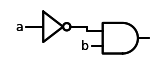

In [ ]:
logicparse('not a and b') # LT(a, b)

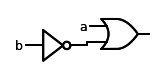

In [ ]:
logicparse('a or not b') # GTE(a, b)

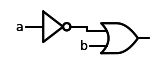

In [60]:
logicparse('not a or b') # LTE(a, b)

In [ ]:
"""NAND-CIRC Programs"""
def EQ(a, b):
  t1 = NAND(NAND(a, a), NAND(b, b)) # OR(a, b)
  t2 = NAND(NAND(t1, NAND(a, b)), NAND(t1, NAND(a, b))) # XOR(a, b)
  return NAND(t2, t2) # NOT(XOR(a, b))
def GT(a, b):
  t1 = NAND(b, b) # NOT(b)
  return NAND(NAND(a, t1), NAND(a, t1))
def LT(a, b):
  t1 = NAND(a, a) # NOT(a)
  return NAND(NAND(t1, b), NAND(t1, b))
def GTE(a, b):
    t1 = NAND(b, b) # NOT(b)
    return NAND(NAND(a, a), NAND(t1, t1))
def LTE(a, b):
    t1 = NAND(a, a) # NOT(a)
    return NAND(NAND(t1, t1), NAND(b, b))

In [ ]:
"""OUTPUTS"""
F = [EQ, GT, LT, GTE, LTE]
T = ["EQ", "GT", "LT", "GTE", "LTE"]
for i, (f, t) in enumerate(zip(F, T)):
  print([t + "(" + str(a) + ", " + str(b) + ") = " + str(True if f(a, b) else False) for a in [0, 1] for b in [0, 1]])

['EQ(0, 0) = True', 'EQ(0, 1) = False', 'EQ(1, 0) = False', 'EQ(1, 1) = True']
['GT(0, 0) = False', 'GT(0, 1) = False', 'GT(1, 0) = True', 'GT(1, 1) = False']
['LT(0, 0) = False', 'LT(0, 1) = True', 'LT(1, 0) = False', 'LT(1, 1) = False']
['GTE(0, 0) = True', 'GTE(0, 1) = False', 'GTE(1, 0) = True', 'GTE(1, 1) = True']
['LTE(0, 0) = True', 'LTE(0, 1) = True', 'LTE(1, 0) = False', 'LTE(1, 1) = True']


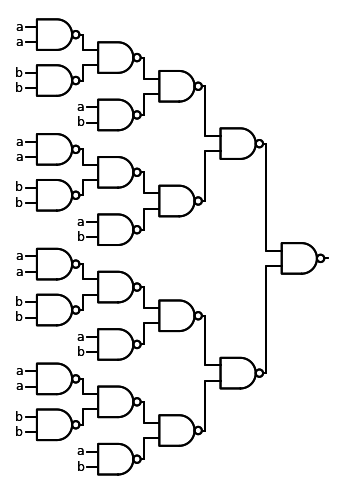

In [61]:
# EQ(a, b)
t1 = '((a nand a) nand (b nand b))'
t2 = '(' + t1 + ' nand (a nand b))' + 'nand (' + t1 + ' nand (a nand b))'
logicparse('(' + t2 + ') nand (' + t2 + ')')

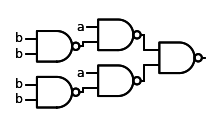

In [62]:
# GT(a, b)
t1 = '(b nand b)'
t2 = '(a nand' + t1 + ')'
logicparse(t2 + 'nand' + t2)

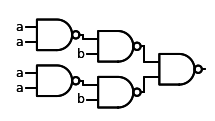

In [ ]:
# LT(a, b)
t1 = '(a nand a)'
t2 = '(' + t1 + 'nand b)'
logicparse(t2 + 'nand' + t2)

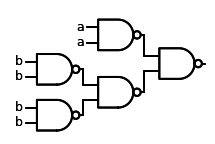

In [ ]:
# GTE(a, b)
t1 = '(b nand b)'
logicparse('(a nand a) nand (' + t1 + 'nand' + t1 + ')')

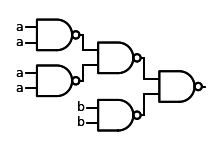

In [ ]:
# LTE(a, b)
t1 = '(a nand a)'
logicparse('(' + t1 + 'nand' + t1 + ') nand (b nand b)')

# EXERCISE 3.9 - LOOKUP(a, b, c)
***NAND*(a, b) = *LOOKUP*(c,  *LOOKUP*(a, *ZERO*, *ONE*), ONE)**
